In [7]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go




# Mutation Name focus

In [2]:
# Folder containing JSON files (one per variant)
variants = ['20H.Beta.V2', '20I.Alpha.V1', '20J.Gamma.V3', '21A.Delta', '21K.Omicron']


# Load all JSON files
mutation_data = {}

for variant_name in variants:
    file = f"{variant_name}.json"
    if os.path.exists(file):
        with open(file) as f:
            data = json.load(f)

            # Normalize mutation counts
            normalized_counts = {
                mut_info["mut"]: mut_info["count"] / data["S"]["total"]
                for mut_info in data["S"]["counts"]
            }

            mutation_data[variant_name] = normalized_counts

# Print normalized mutation data
print(mutation_data)


{'20H.Beta.V2': {'S:L18F': 0.46113961652714014, 'S:A27S': 0.09152038887388604, 'S:T19I': 0.026519038617337294, 'S:P384L': 0.019308668647042938, 'S:T240-': 0.018768566027545234, 'S:A899S': 0.018147448015122872, 'S:L5F': 0.018066432622198217, 'S:A67V': 0.013934647583040779, 'S:S689R': 0.010045908722657305, 'S:Y144-': 0.008911693221712126}, '20I.Alpha.V1': {'S:K1191N': 0.03363830905174215, 'S:L5F': 0.032831046534061055, 'S:S98F': 0.018545700571396057, 'S:W152R': 0.015367326671935803, 'S:D138H': 0.011491044098048612, 'S:L18F': 0.006744376056309228, 'S:I68-': 0.0055281479459703105, 'S:T572I': 0.005372563209633096}, '20J.Gamma.V3': {'S:P681H': 0.0556139026551577, 'S:A688V': 0.025132101480192983, 'S:N679K': 0.019372148741343662, 'S:S1252F': 0.013300403688995372, 'S:Q675H': 0.011281958712133644, 'S:L5F': 0.009649151596704847, 'S:A845S': 0.00923889855262726, 'S:Y144-': 0.008188650759788637, 'S:E661D': 0.00772916735042174, 'S:D427N': 0.00758968131543536}, '21A.Delta': {'S:T95I': 0.38998636012716

In [3]:
import pandas as pd

# Convert mutation data to DataFrame
mutation_df = pd.DataFrame(mutation_data).fillna(0)
mutation_df.to_csv("mutations.csv")

# Identify increasing/decreasing mutations
mutation_trends = mutation_df.diff(axis=1).fillna(0)  # Compute difference between time points

# Print increasing mutations
increasing_mutations = (mutation_trends > 0).sum(axis=1).sort_values(ascending=False)
print("Increasing mutations:", increasing_mutations.head())

# Print decreasing mutations
decreasing_mutations = (mutation_trends < 0).sum(axis=1).sort_values(ascending=False)
print("Decreasing mutations:", decreasing_mutations.head())


Increasing mutations: S:Y144-    2
S:V213G    2
S:A845S    1
S:N501Y    1
S:T95I     1
dtype: int64
Decreasing mutations: S:L18F     2
S:Y144-    2
S:L5F      2
S:Q675H    1
S:A27S     1
dtype: int64


In [34]:
# from scipy.stats import pearsonr

# # Load variant case data from TSV
# variant_cases = pd.read_csv("time_series_variants.csv", sep=",")

# # Convert Date column to datetime format
# variant_cases["Date"] = pd.to_datetime(variant_cases["Date"])

# # Merge with mutation frequency data
# merged_data = variant_cases.merge(mutation_df.T, left_index=True, right_index=True)

# # Compute correlations between mutations and variant case counts
# correlations = {}
# for mutation in mutation_df.index:
#     for variant in variant_cases.columns[1:]:  # Exclude Date column
#         corr, p_value = pearsonr(merged_data[variant], merged_data[mutation])
#         correlations[(mutation, variant)] = (corr, p_value)

# # Print top significant correlations
# significant_corrs = {k: v for k, v in correlations.items() if abs(v[0]) > 0.5 and v[1] < 0.05}
# print("Significant correlations:", significant_corrs)


In [13]:
mutation_df = pd.read_csv("mutations.csv", index_col=0)

fig = go.Figure(data=go.Heatmap(
                     z=mutation_df.values[::-1],
                     x=mutation_df.columns,
                     y=mutation_df.index[::-1],
                     colorscale='Viridis'))

fig.show()


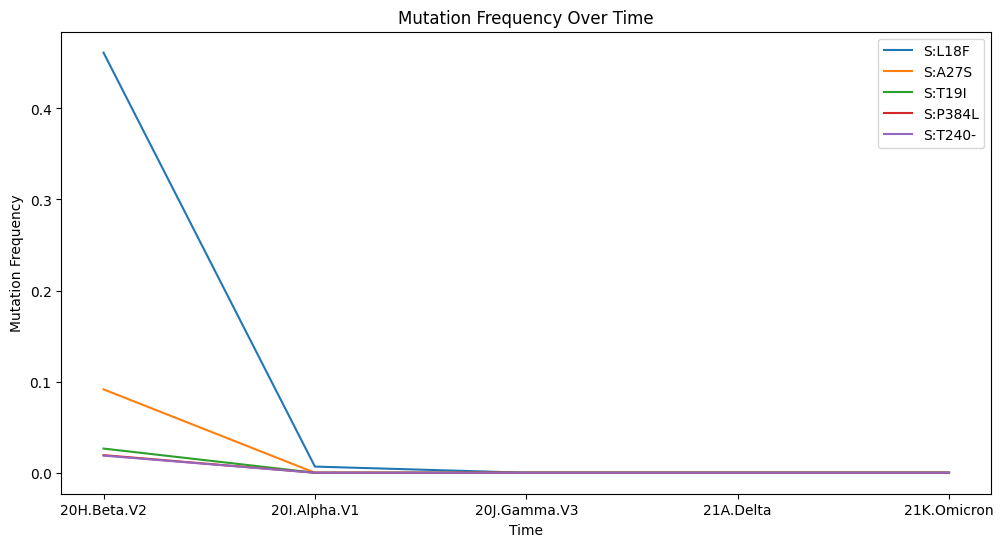

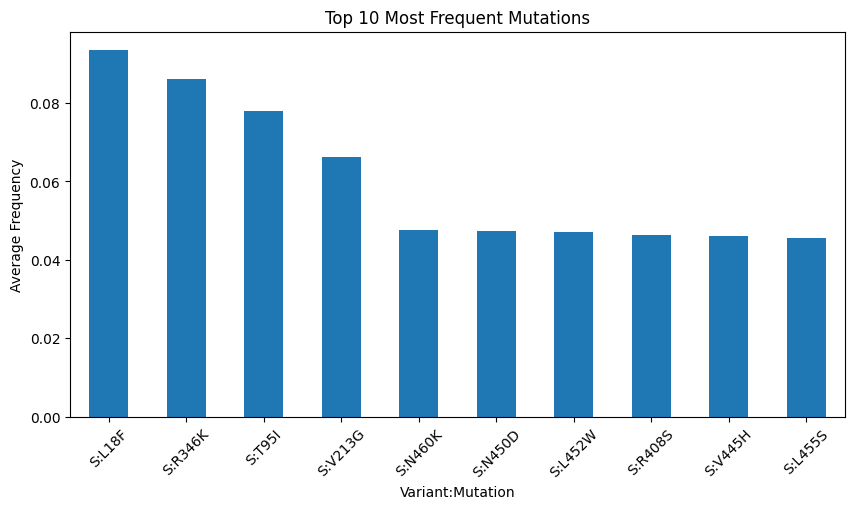

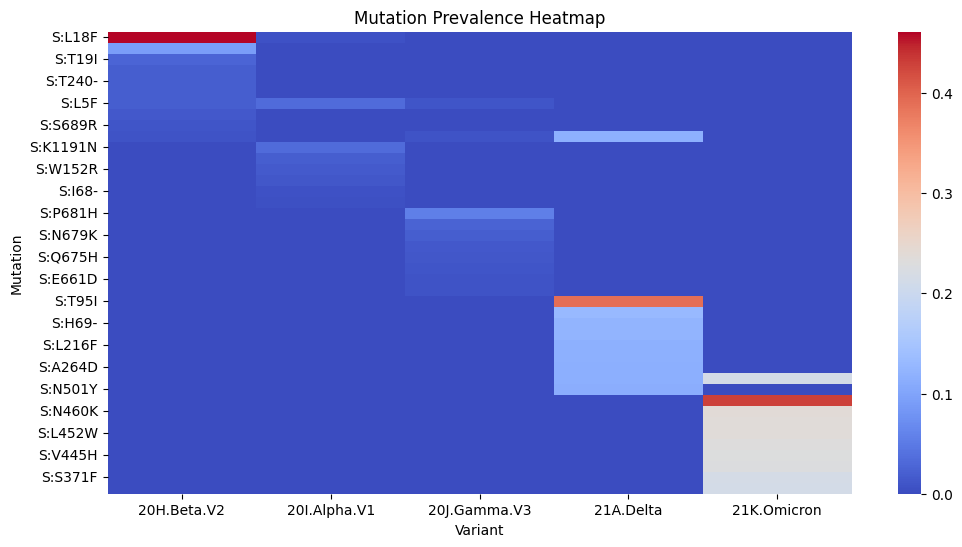

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for mutation frequencies over time
plt.figure(figsize=(12, 6))
for mutation in mutation_df.index[:5]:  # Plot top 5 mutations
    plt.plot(mutation_df.loc[mutation], label=mutation)
plt.xlabel("Time")
plt.ylabel("Mutation Frequency")
plt.title("Mutation Frequency Over Time")
plt.legend()
plt.show()

# Bar chart for prevalence of mutations in each variant
mutation_df.mean(axis=1).sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10, 5))
plt.ylabel("Average Frequency")
plt.xlabel("Variant:Mutation")
plt.title("Top 10 Most Frequent Mutations")
plt.xticks(rotation=45)
plt.show()




# Mutation Count Focus


In [10]:
import json
import os
import pandas as pd

# Folder containing JSON files (one per variant)
variants = ['20H.Beta.V2', '20I.Alpha.V1', '20J.Gamma.V3', '21A.Delta', '21K.Omicron']

mutation_summary = {}

for variant_name in variants:
    file = f"{variant_name}.json"
    if os.path.exists(file):
        with open(file) as f:
            data = json.load(f)
        
        # Total mutations in S and others
        num_mutations = len(data["S"]["counts"]) + len(data["others"]["counts"])
        
        # Total sequences for normalization
        total_sequences = data["S"]["total"]
        
        mutation_summary[variant_name] = {
            "num_mutations": num_mutations,
            "total_sequences": total_sequences
        }

# Convert to DataFrame
mutation_summary_df = pd.DataFrame(mutation_summary).T

# Print summary
print(mutation_summary_df)


              num_mutations  total_sequences
20H.Beta.V2              20            37030
20I.Alpha.V1             18          1124789
20J.Gamma.V3             20           121876
21A.Delta                20          4692859
21K.Omicron              20          2922928


In [11]:
# Load time series variant case counts from TSV
case_counts = pd.read_csv("time_series_variants.csv", sep=",")  

# Convert Date to datetime
case_counts["Date"] = pd.to_datetime(case_counts["Date"])

# Sum total mutations for each variant over time
case_counts["Total_Mutations"] = case_counts.iloc[:, 1:].sum(axis=1)

# Normalize case counts by total sequences
for variant in variants:
    if variant + "_table" in case_counts.columns:
        case_counts[variant + "_normalized"] = (
            case_counts[variant + "_table"] / mutation_summary_df.loc[variant, "total_sequences"]
        )

# Print processed case count data
print(case_counts.head())

        Date  20H.Beta.V2_table  20I.Alpha.V1_table  20J.Gamma.V3_table  \
0 2020-08-14              239.0                 0.0                 0.0   
1 2020-08-15                0.0                 0.0                 0.0   
2 2020-08-16                0.0                 0.0                 0.0   
3 2020-08-17                0.0                 0.0                 0.0   
4 2020-08-18             6880.0                 0.0                 0.0   

   21A.Delta_table  21K.Omicron_table  Total_Mutations  \
0              0.0                0.0            239.0   
1              0.0                0.0              0.0   
2              0.0                0.0              0.0   
3              0.0                0.0              0.0   
4              0.0                0.0           6880.0   

   20H.Beta.V2_normalized  20I.Alpha.V1_normalized  20J.Gamma.V3_normalized  \
0                0.006454                      0.0                      0.0   
1                0.000000                 

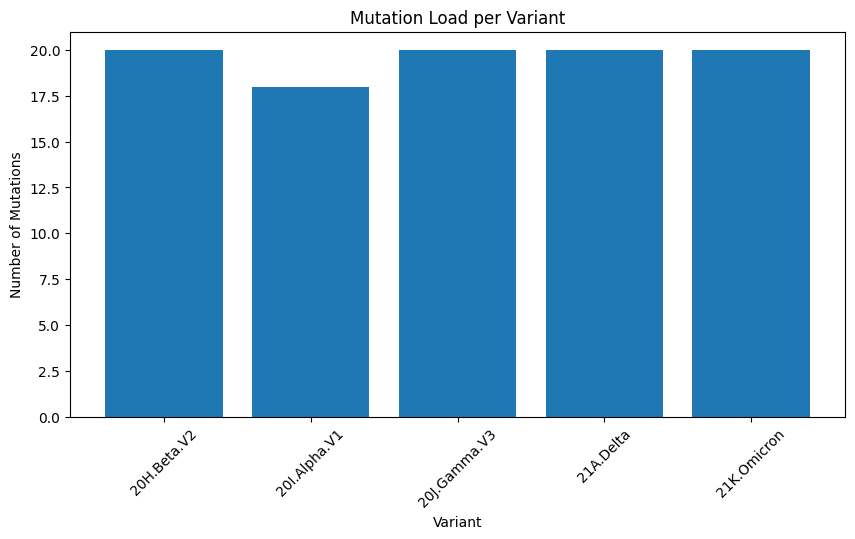

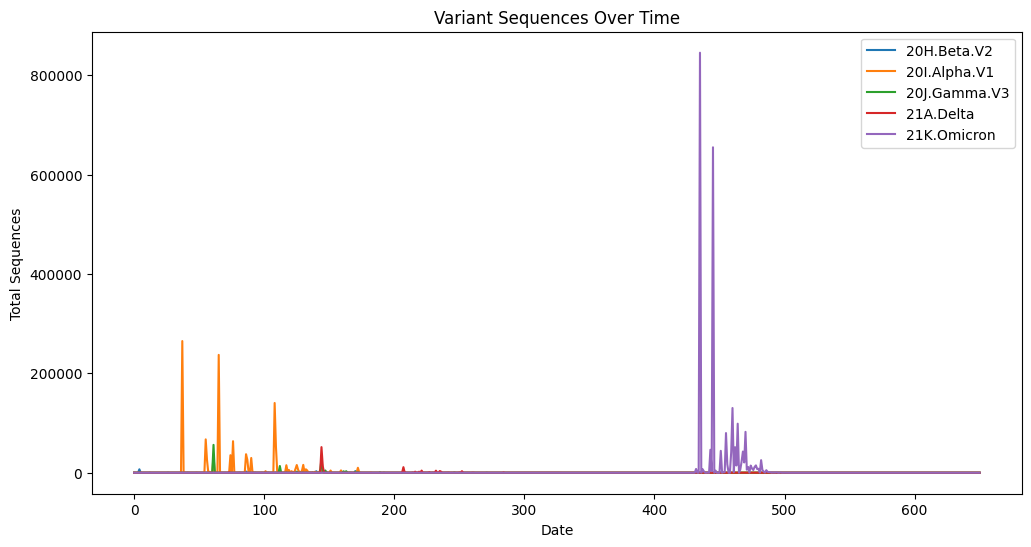

In [13]:
import matplotlib.pyplot as plt

# Plot total mutations per variant
plt.figure(figsize=(10, 5))
plt.bar(mutation_summary_df.index, mutation_summary_df["num_mutations"])
plt.xlabel("Variant")
plt.ylabel("Number of Mutations")
plt.title("Mutation Load per Variant")
plt.xticks(rotation=45)
plt.show()

# Plot total sequences over time for variants
plt.figure(figsize=(12, 6))
for variant in variants:
    plt.plot(case_counts[variant + "_table"], label=variant)
plt.xlabel("Date")
plt.ylabel("Total Sequences")
plt.title("Variant Sequences Over Time")
plt.legend()
plt.show()


# Mutation count analysis 2

In [14]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Folder containing JSON files (one per variant)
variants = ['20H.Beta.V2', '20I.Alpha.V1', '20J.Gamma.V3', '21A.Delta', '21K.Omicron']

# Load mutation data
mutation_summary = {}

for variant_name in variants:
    file = f"{variant_name}.json"
    if os.path.exists(file):
        with open(file) as f:
            data = json.load(f)
        
        # Total number of mutations (S + others)
        num_mutations = len(data["S"]["counts"]) + len(data["others"]["counts"])
        
        # Total sequences
        total_sequences = data["S"]["total"]

        mutation_summary[variant_name] = {
            "num_mutations": num_mutations,
            "total_sequences": total_sequences
        }

# Convert to DataFrame
mutation_summary_df = pd.DataFrame(mutation_summary).T
print(mutation_summary_df)


              num_mutations  total_sequences
20H.Beta.V2              20            37030
20I.Alpha.V1             18          1124789
20J.Gamma.V3             20           121876
21A.Delta                20          4692859
21K.Omicron              20          2922928


In [21]:
# Load time series data
case_counts = pd.read_csv("time_series_variants.csv", sep=",")

# Convert Date to datetime
case_counts["Date"] = pd.to_datetime(case_counts["Date"])

# Sum total mutations for each variant over time
case_counts["Total_Sequences"] = case_counts.iloc[:, 1:].sum(axis=1)

# Add mutation load per variant
for variant in variants:
    if variant + "_table" in case_counts.columns:
        case_counts[variant + "_mutations"] = mutation_summary_df.loc[variant, "num_mutations"]
        
case_counts.to_csv("case_counts_with_mutations.csv", index=False)

print(case_counts.head())


        Date  20H.Beta.V2_table  20I.Alpha.V1_table  20J.Gamma.V3_table  \
0 2020-08-14              239.0                 0.0                 0.0   
1 2020-08-15                0.0                 0.0                 0.0   
2 2020-08-16                0.0                 0.0                 0.0   
3 2020-08-17                0.0                 0.0                 0.0   
4 2020-08-18             6880.0                 0.0                 0.0   

   21A.Delta_table  21K.Omicron_table  Total_Sequences  20H.Beta.V2_mutations  \
0              0.0                0.0            239.0                     20   
1              0.0                0.0              0.0                     20   
2              0.0                0.0              0.0                     20   
3              0.0                0.0              0.0                     20   
4              0.0                0.0           6880.0                     20   

   20I.Alpha.V1_mutations  20J.Gamma.V3_mutations  21A.Delta_m

In [16]:
# Compute correlations
correlations = {}
for variant in variants:
    if variant + "_table" in case_counts.columns:
        seq_counts = case_counts[variant + "_table"]
        mutations = case_counts[variant + "_mutations"]
        corr, p_value = pearsonr(seq_counts, mutations)
        correlations[variant] = {"correlation": corr, "p_value": p_value}

# Convert to DataFrame
correlation_df = pd.DataFrame(correlations).T
print("Correlation between mutation count and sequence count:")
print(correlation_df)


Correlation between mutation count and sequence count:
              correlation  p_value
20H.Beta.V2           NaN      NaN
20I.Alpha.V1          NaN      NaN
20J.Gamma.V3          NaN      NaN
21A.Delta             NaN      NaN
21K.Omicron           NaN      NaN


/home/roja_26/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


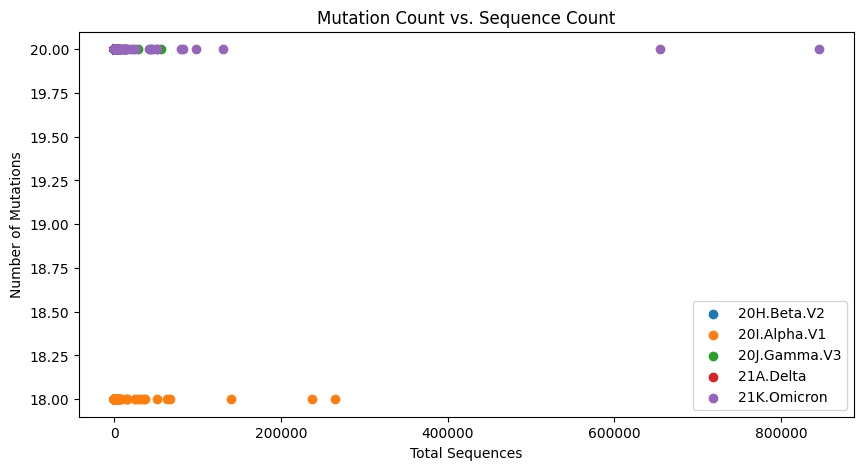

In [17]:
plt.figure(figsize=(10, 5))
for variant in variants:
    if variant + "_table" in case_counts.columns:
        plt.scatter(case_counts[variant + "_table"], case_counts[variant + "_mutations"], label=variant)
        
plt.xlabel("Total Sequences")
plt.ylabel("Number of Mutations")
plt.title("Mutation Count vs. Sequence Count")
plt.legend()
plt.show()


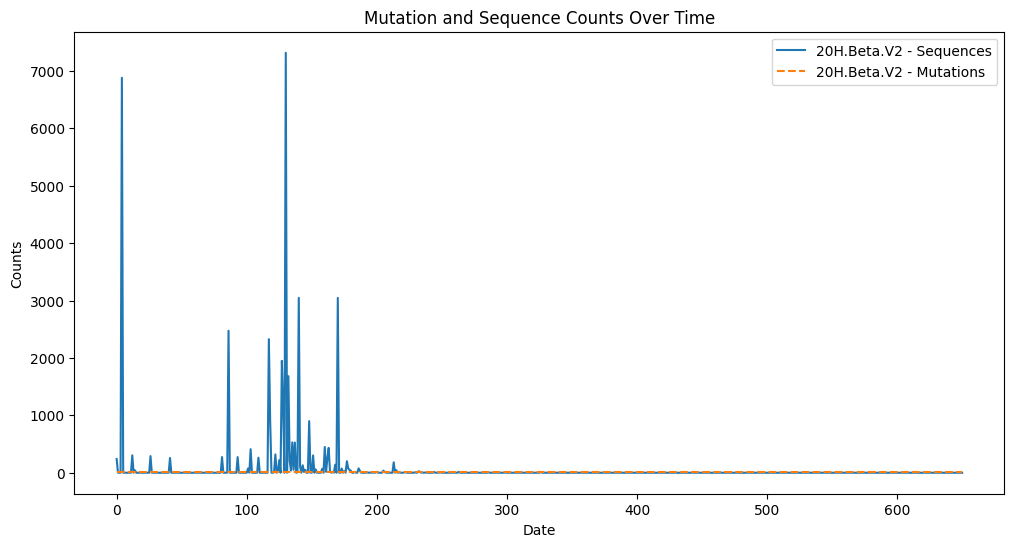

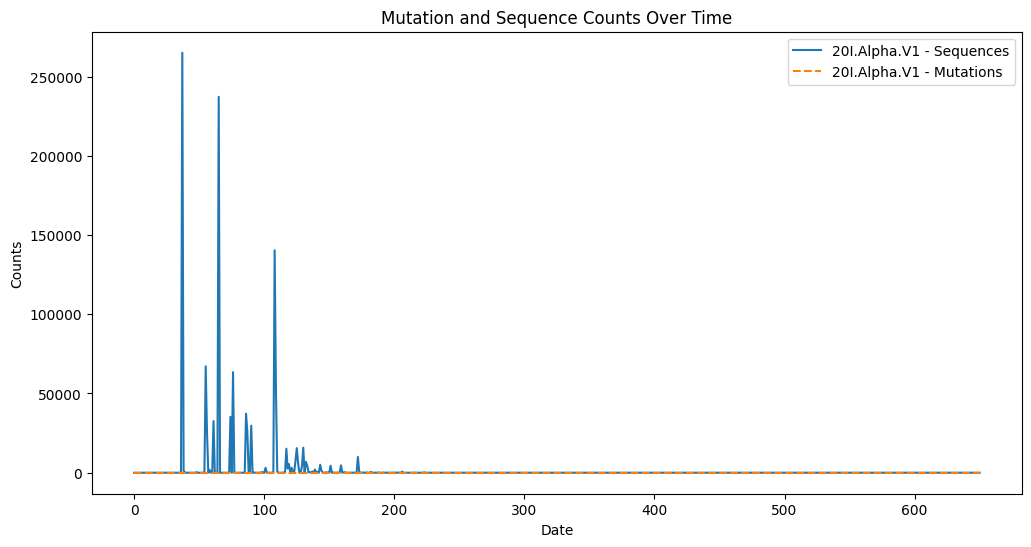

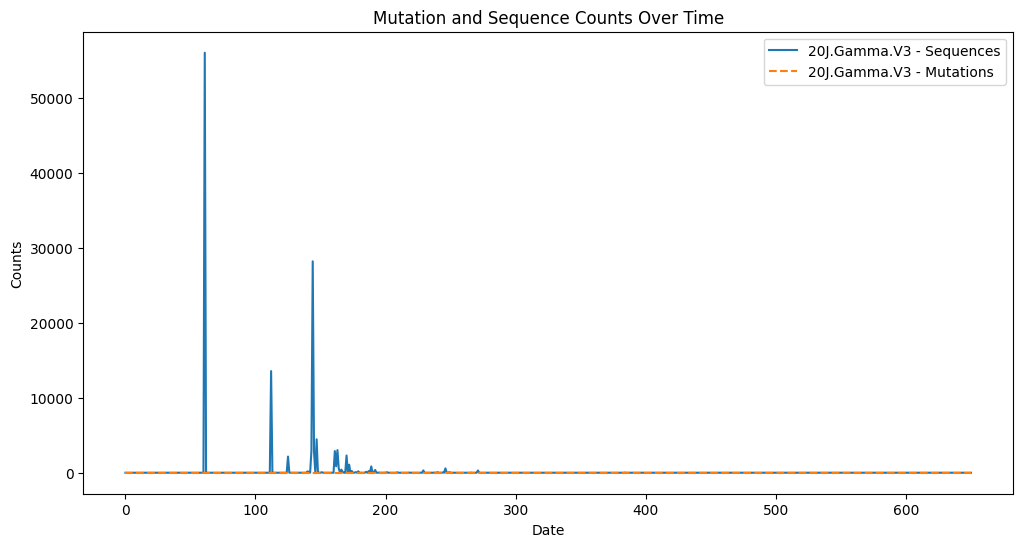

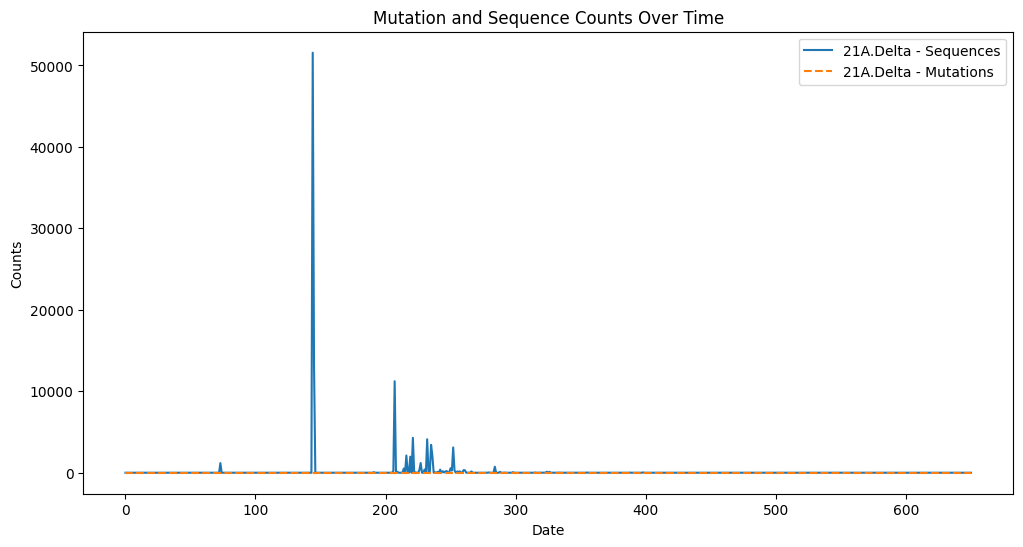

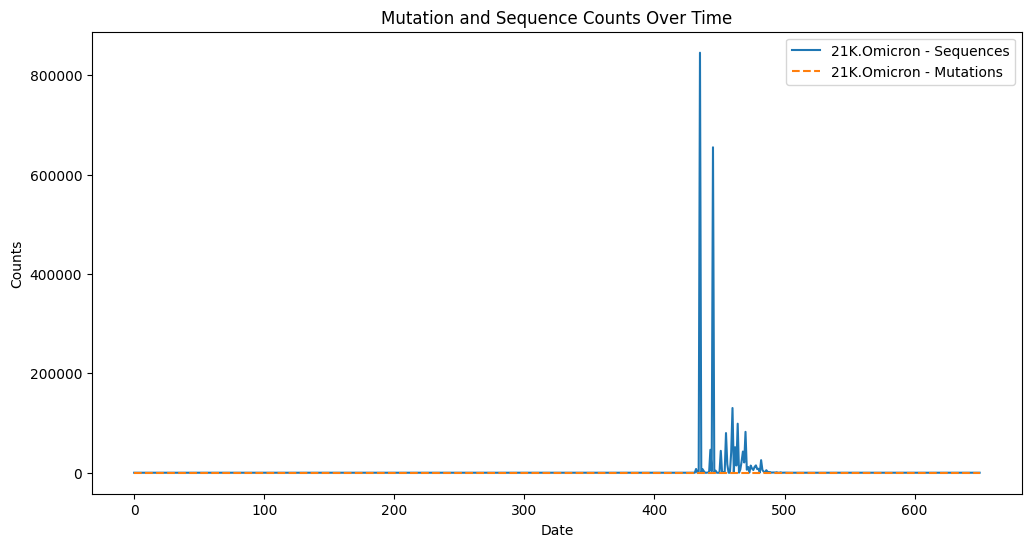

In [20]:
for variant in variants:
    plt.figure(figsize=(12, 6))
    plt.plot(case_counts[variant + "_table"], label=f"{variant} - Sequences")
    plt.plot(case_counts[variant + "_mutations"], linestyle="--", label=f"{variant} - Mutations")

    plt.xlabel("Date")
    plt.ylabel("Counts")
    plt.title("Mutation and Sequence Counts Over Time")
    plt.legend()
    plt.show()


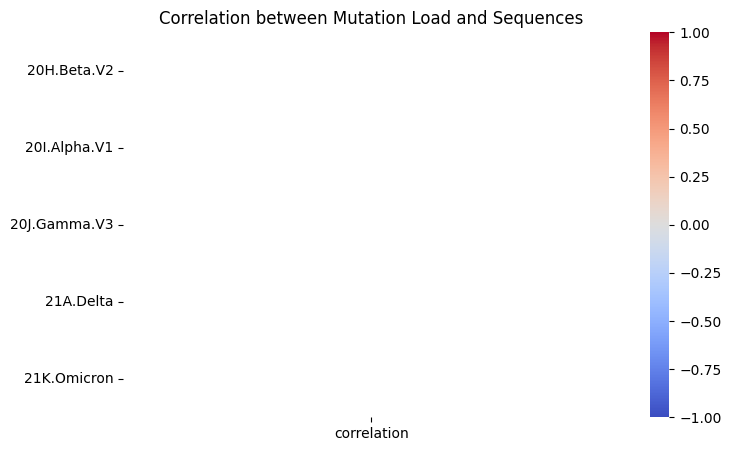

In [22]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_df[["correlation"]], annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Mutation Load and Sequences")
plt.show()


# Not done

In [ ]:
# Load variant case count data (TSV file)
tsv_file = "variant_cases.tsv"
case_data = pd.read_csv(tsv_file, sep="\t")

# Merge mutation frequency data with variant case counts
merged_data = mutation_df.merge(case_data, on="Variant")

# Compute correlation between mutation frequency and variant prevalence
correlations = []
for mut in mutation_df["Mutation"].unique():
    mut_subset = merged_data[merged_data["Mutation"] == mut]
    if len(mut_subset) > 1:  # Ensure enough data points
        corr, p_val = pearsonr(mut_subset["Frequency"], mut_subset["num_seqs"])
        correlations.append({"Mutation": mut, "Correlation": corr, "P-value": p_val})

correlation_df = pd.DataFrame(correlations).sort_values(by="Correlation", ascending=False)

# Save correlation results
correlation_df.to_csv("mutation_variant_correlation.csv", index=False)


In [ ]:

# ----------------- Visualization -----------------

# Plot mutation frequencies for each variant
plt.figure(figsize=(12, 6))
sns.boxplot(data=mutation_df, x="Variant", y="Frequency")
plt.title("Mutation Frequency Distribution by Variant")
plt.xticks(rotation=45)
plt.show()

# Heatmap of mutation prevalence across variants
pivot_df = mutation_df.pivot(index="Mutation", columns="Variant", values="Frequency").fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap="viridis", annot=True, fmt=".2f")
plt.title("Heatmap of Mutation Prevalence by Variant")
plt.show()

# Scatter plot for mutation-variant correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=correlation_df, x="Mutation", y="Correlation", hue="P-value", palette="coolwarm", size="P-value")
plt.xticks(rotation=90)
plt.title("Mutation Frequency vs. Variant Spread Correlation")
plt.show()